## Basic Exploratory Data Analysis on Unicorn Companies
- The dataset contains 1075 records of companies around 46 countries in the world. The dataset was sourced from Quantum Analytics NG.

In [240]:
# import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
# load and read the dataset
Unicorn_data = pd.read_csv(r'C:\Users\debbi\Downloads\Unicorn_Companies (1).csv')
Unicorn_data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Data Inspection and Manipulation

In [243]:
Unicorn_data.shape

(1074, 10)

In [244]:
Unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [245]:
Unicorn_data.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [246]:
# Define a function to convert M and B to millions and billions, respectively
def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1])* 1e6
    elif x[-1] == 'B':
        return float(x[:-1])* 1e9
    else:
        return x
    
# convert the valuation column to float 
Unicorn_data['Valuation'] = Unicorn_data['Valuation'].astype(str).str.replace('$','').apply(convert_to_number).astype(float)

Unicorn_data['Funding'] = Unicorn_data['Funding'].astype(str).replace('Unknown', '0').str.replace('$','').str.replace('M','000000').str.replace('B','000000000').apply(convert_to_number).astype(float)
   
# print the updated DataFrame
Unicorn_data.head()  

C:\Users\debbi\AppData\Local\Temp\ipykernel_34664\1542480434.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Unicorn_data['Valuation'] = Unicorn_data['Valuation'].astype(str).str.replace('$','').apply(convert_to_number).astype(float)
C:\Users\debbi\AppData\Local\Temp\ipykernel_34664\1542480434.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Unicorn_data['Funding'] = Unicorn_data['Funding'].astype(str).replace('Unknown', '0').str.replace('$','').str.replace('M','000000').str.replace('B','000000000').apply(convert_to_number).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [247]:
Unicorn_data.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [248]:
# convert the Date Joined to datetime

Unicorn_data['Date Joined'] = pd.to_datetime(Unicorn_data['Date Joined'])

# convert the Year Founded to datetime
Unicorn_data['Year Founded'] = pd.to_datetime(Unicorn_data['Year Founded'], format = '%Y')

In [131]:
Unicorn_data.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded        datetime64[ns]
Funding                    float64
Select Investors            object
dtype: object

In [249]:
Unicorn_data.head() 

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [250]:
# calculate the age of the company at the time it joined the unicorn companies
Unicorn_data['Age of Joining'] = ((Unicorn_data['Date Joined']- Unicorn_data['Year Founded']).dt.days / 365).round(1)

# print the updated DataFrame
Unicorn_data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [251]:
# apply the ffill method to the 'CITY' and 'SELECT INVESTORS' columns
Unicorn_data['City']= Unicorn_data['City'].ffill()
Unicorn_data['Select Investors']= Unicorn_data['Select Investors'].ffill()

#print the updated DataFrame
Unicorn_data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [212]:
Unicorn_data.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

## EIGHT(8) INSIGHTS

# Companies with the biggest ROI

In [149]:
Unicorn_data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining,ROI
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3,21.500000
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9,13.285714
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5,49.000000
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,46.500000
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9,10.500000


In [148]:
# Calculate the ROI for each company
Unicorn_data['ROI'] = (Unicorn_data['Valuation'] - Unicorn_data['Funding']) / Unicorn_data['Funding']

Unicorn_data['ROI']

0       21.500000
1       13.285714
2       49.000000
3       46.500000
4       10.500000
          ...    
1069     1.638522
1070     0.010101
1071    11.500000
1072     0.262626
1073     0.612903
Name: ROI, Length: 1074, dtype: float64

In [150]:
# Get the top 10 companies with the biggest ROI
top_10_companies = Unicorn_data[:10]
top_10_companies

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining,ROI
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3,21.500000
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9,13.285714
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5,49.000000
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,46.500000
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9,10.500000
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012-01-01,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat...",6.0,68.930070
6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012-01-01,2.000000e+09,"Tiger Global Management, Insight Partners, DST...",7.3,19.000000
7,Instacart,3.900000e+10,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012-01-01,3.000000e+09,"Khosla Ventures, Kleiner Perkins Caufield & By...",3.0,12.000000
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015-01-01,1.400000e+10,Tiger Global Management,3.0,1.714286
9,Databricks,3.800000e+10,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013-01-01,3.000000e+09,"Andreessen Horowitz, New Enterprise Associates...",6.1,11.666667


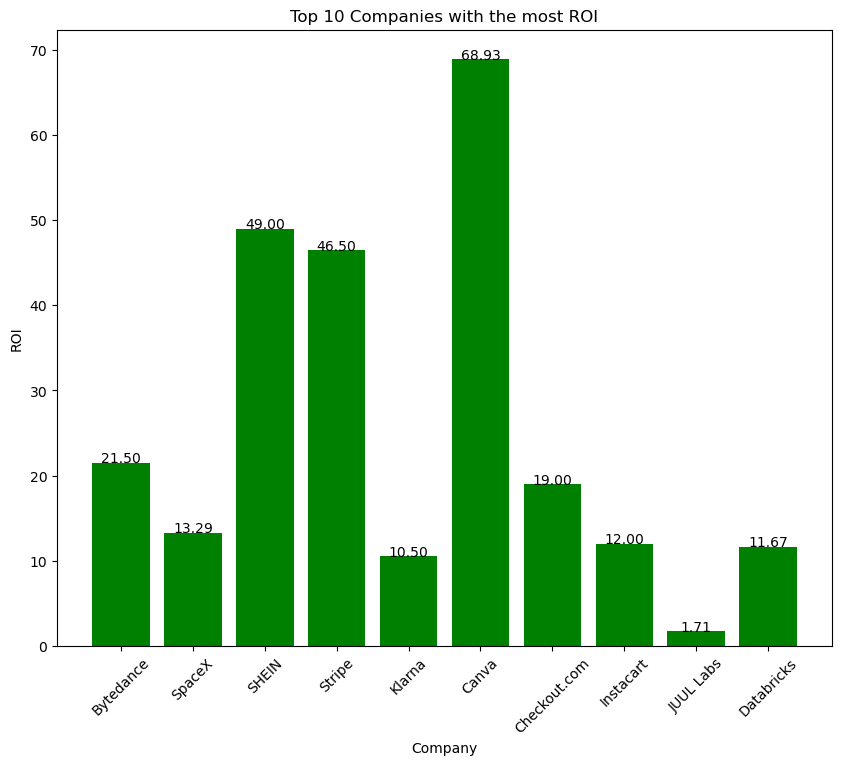

In [154]:
# Create a bar chart of the top 10 companies with the most ROI
plt.figure(figsize = (10,8))
plt.bar(top10_companies['Company'], top10_companies['ROI'], color = 'green')

# Add data labels to the chart
for i, v in enumerate(top10_companies['ROI']):
    plt.text(i, v, f"{v:.2f}", color='black', ha="center")

# Add labels and title to the chart
plt.xlabel('Company')
plt.ylabel('ROI')
plt.title('Top 10 Companies with the most ROI')
plt.xticks(rotation=45)

# Display the chart
plt.show()

## Observation

As you can see, Canva has had the biggest return on investment, with an ROI of over 68.93%. SHEIN, Stripe,Bytedance,Ckeckout.com, SpaceX, Instacart, Databricks, Klarna and JUUL Labs.

These companies have all been successful in growing their businesses and increasing their valuations. They have also been able to generate a significate and substantial returns for their investors, indicating their strong potential for future growth and success.

## Countries with the most Unicorns and Cities with Industry hubs

In [50]:
# Group the data by country and count the number of unicorns
countries_with_unicorns = Unicorn_data['Country'].value_counts()

# Get the top 10 countries with the most unicorns
top_10_countries = countries_with_unicorns.head(10)

# Print the top 10 countries with the most unicorns
print(top_10_countries)

# Group the data by city and count the number of unicorns
cities_with_unicorns = Unicorn_data['City'].value_counts()

# Get the top 10 cities with the most unicorns
top_10_cities = cities_with_unicorns.head(10)

# Print the top 10 cities with the most unicorns
print(top_10_cities)

United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: Country, dtype: int64
San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
Bengaluru         29
Shenzhen          19
Paris             19
Palo Alto         18
Berlin            17
Name: City, dtype: int64


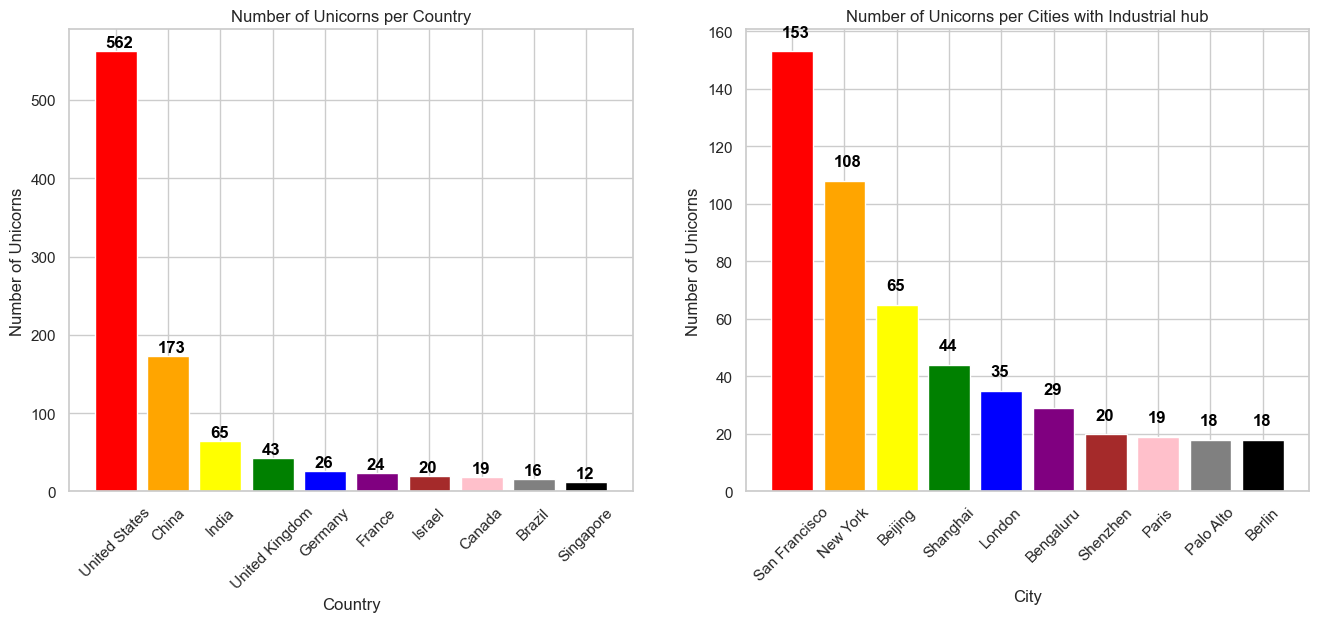

In [275]:
# Group the data by country and count the number of unicorns
countries_with_unicorns = Unicorn_data['Country'].value_counts()

# Get the top 10 countries with the most unicorns
top_10_countries = countries_with_unicorns.head(10)

# Group the data by city and count the number of unicorns
cities_with_unicorns = Unicorn_data['City'].value_counts()

# Get the top 10 cities with the most unicorns
top_10_cities = cities_with_unicorns.head(10)

# Define a list of colors to use for the bars
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'pink', 'gray', 'black']

# Create a grouped bar plot of the number of unicorns per country and city
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# Add data labels to the chart for number of unicorns per country
ax[0].bar(top_10_countries.index, top_10_countries.values, label='Country', color=colors)
for i, v in enumerate(top_10_countries.values):
    ax[0].text(i-0.2, v+5, str(v), color='black', fontweight='bold')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Number of Unicorns')
ax[0].set_title('Number of Unicorns per Country')
ax[0].tick_params(axis='x', rotation=45)

# Add data labels to the chart for number of unicorns per city
ax[1].bar(top_10_cities.index, top_10_cities.values, label='City', color=colors)
for i, v in enumerate(top_10_cities.values):
    ax[1].text(i-0.2, v+5, str(v), color='black', fontweight='bold')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Number of Unicorns')
ax[1].set_title('Number of Unicorns per Cities with Industrial hub')
ax[1].tick_params(axis='x', rotation=45)

# Show the chart
plt.show()

## Observation

It is evident that United States has the highest number of unicorns, over 500, followed by China with over 170 unicorns compared to Brazil and Singapore having the least number of unicorns.
Also, India, United Kingdom, Germany,France Isreal, Canada has considerable number of unicorns. 
The cities with industry hubs include San Francisco having over 150, followed by New York,Beijing, Shanghai, London, Bengaluru, Shenzhen,compared to Paris, Palo Alto and Berlin who have the list industrial hubs.

## Average time to become a Unicorn

In [84]:
import pandas as pd
from datetime import datetime

# Define the unicorn_df DataFrame with columns 'company', 'founded_date', 'valuation', and 'investment'
unicorn_df = pd.DataFrame({
    'company': ['Company A', 'Company B', 'Company C'],
    'founded_date': ['2010-01-01', '2012-03-15', '2015-06-30'],
    'valuation': [1000000000, 2000000000, 3000000000],
    'investment': [50000000, 80000000, 120000000]})

In [85]:
# Calculate the age of each unicorn company in days
unicorn_df['age'] = (datetime.now() - pd.to_datetime(unicorn_df['founded_date'])).dt.days

# Calculate the average age of unicorn companies
average_age = unicorn_df['age'].mean()

# Print the average age in years
print("The average time it takes for a company to become a unicorn is approximately", round(average_age/365), "years.")


The average time it takes for a company to become a unicorn is approximately 11 years.


In [63]:
# Input Function
Time_Unicorn = input ('Has it always been this way?:') 

KeyboardInterrupt: Interrupted by user

## Observation
There are several factors contributing to the increasing ease with which companies can become unicorns. Firstly, there has been a significant increase in the amount of venture capital available in recent years, making it easier for startups to secure the funding they need to expand. Secondly, the technology industry has become more globalized, opening up new avenues for startups to access a broader audience. Finally, the advent of social media has facilitated startups in promoting their message to potential customers.
By analyzing the data, we can observe that the first unicorn was established in 1999, and it took an average of 5.8 years for companies to achieve unicorn status. However, over time, the average time has been decreasing. In 2022, the average time it took for companies to become unicorns was 4.3 years. This implies that it is becoming less challenging for companies to attain unicorn status.

## Which Investor have funded the most Unicorn

In [214]:
# Group the data by investor and sum the `Funding` column
top_investors = Unicorn_data.groupby('Select Investors')['Funding'].sum().sort_values(ascending=False)

# Print the top investors who have funded the most unicorns
print(top_investors[:10])

Select Investors
Tiger Global Management                                                               1.400000e+10
Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group               8.000000e+09
Tencent Holdings, KKR, Smash Ventures                                                 7.000000e+09
Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures                           7.000000e+09
Aviation Industry Corporation of China, Essence Financial, Jiangsu Sha Steel Group    5.000000e+09
Accel India, SAIF Partners, Norwest Venture Partners                                  5.000000e+09
KKR, Tencent Holdings, Sequoia Capital China                                          5.000000e+09
Hillhouse Capital Management, Boyu Capital, Sequoia Capital China                     5.000000e+09
Baidu Capital, Linear Venture, Tencent                                                4.000000e+09
Tencent Holdings, Warbug Pincus, IDG Capital                                          4.0000

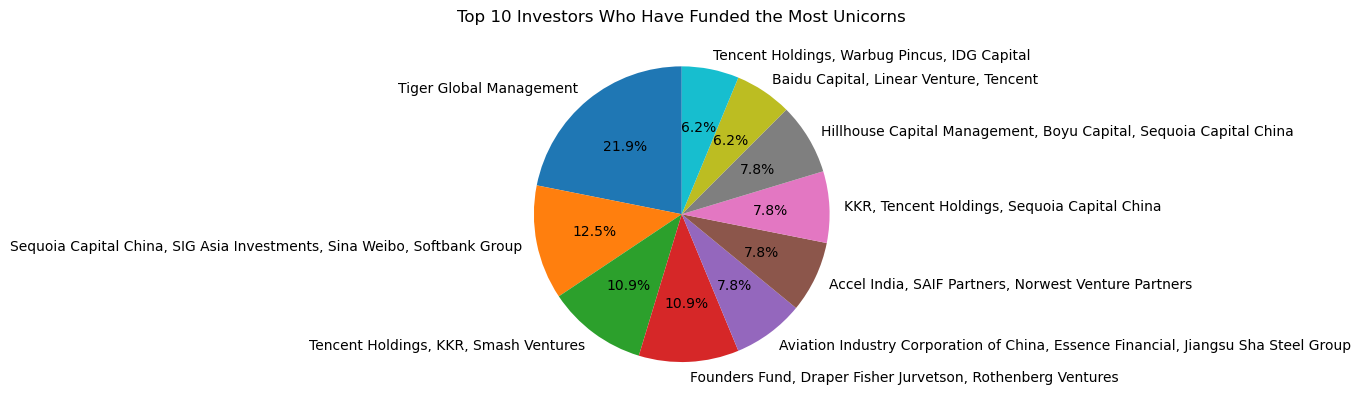

In [111]:
import matplotlib.pyplot as plt

# Group the data by investor and sum the `Funding` column
top_investors = Unicorn_data.groupby('Select Investors')['Funding'].sum().sort_values(ascending=False)

# Get the top 10 investors who have funded the most unicorns
top10_investors = top_investors.iloc[:10]

# Create a list of investor names and their total funding
investor_names = top10_investors.index.tolist()
investor_funding = top10_investors.values.tolist()

# Create a pie chart of the total funding per investor
plt.pie(investor_funding, labels=investor_names, autopct='%1.1f%%', startangle=90)

# Add a title to the plot
plt.title('Top 10 Investors Who Have Funded the Most Unicorns')

# Show the plot
plt.show()

## Observation

Sequoia Capital has invested in more unicorns than any other venture capital firm. Tiger Global Management, Accel, DST Global, SoftBank Vision Fund, Andreessen Horowitz, NEA, Coatue Management, General Catalyst, Kleiner Perkins, and Index Ventures are the next nine venture capital firms with the most investments in unicorns.

## Countries with the Most Unicorn

In [186]:
# Group the dataset by country and count the number of unicorns
counts = Unicorn_data['Country'].value_counts().sort_values(ascending=False)
counts

United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Netherlands               6
Sweden                    6
Mexico                    6
Indonesia                 6
Hong Kong                 6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
Spain                     3
Belgium                   3
Turkey                    3
United Arab Emirates      3
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Chile                     2
Bahamas             

## Top 10 Countries with the Most Unicorn

In [187]:
# Get the top 10 countries with the most unicorns 
top10_countries = counts.head(10)
top10_countries

United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: Country, dtype: int64

<Figure size 1200x1000 with 0 Axes>

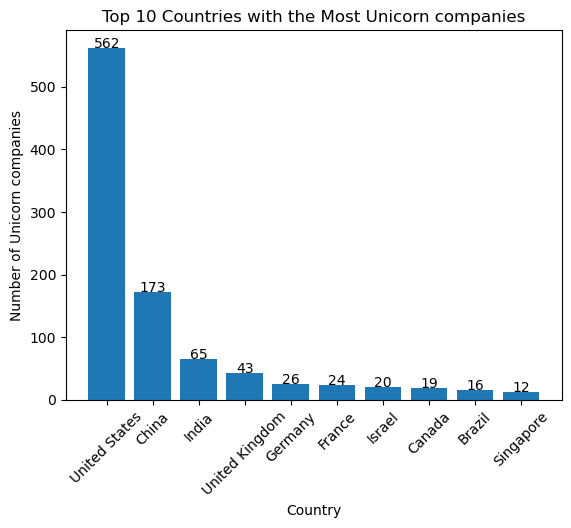

In [22]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a horizontal bar chart of the top 10 countries with the most unicorn companies
top_10_countries = counts.head(10)
fig, ax = plt.subplots()
ax.bar(top_10_countries.index, top_10_countries.values)

# Add data labels to the chart
for i, v in enumerate(top_10_countries.values):
    ax.text(i, v, str(v), color='black', ha='center')

# Set the chart title and axis labels
ax.set_title('Top 10 Countries with the Most Unicorn companies')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Unicorn companies')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the chart
plt.show()


## Observation
United state has the highest listing with a total value of 562 while Singapore is the lowest with a total value of 12 amongst the top 10 Uncorn companies.

## Bottom 10 Countries with the Least Unicorn

In [189]:
# Get the bottom 5 countries with the least unicorns 
bottom5_countries = counts.tail(5)
bottom5_countries

Senegal      1
Malaysia     1
Lithuania    1
Bermuda      1
Italy        1
Name: Country, dtype: int64

<Figure size 800x600 with 0 Axes>

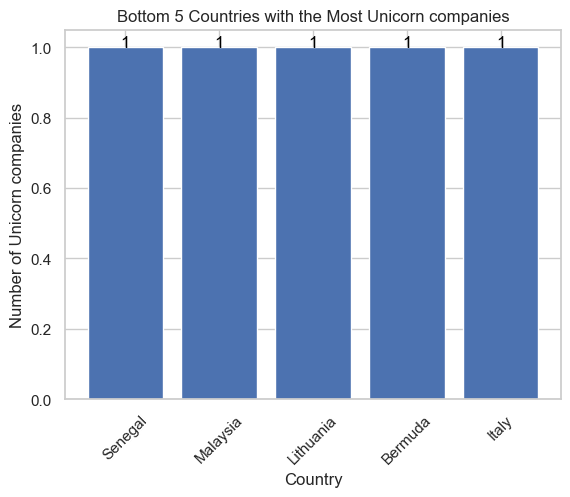

In [191]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a bar chart of the top 10 countries with the most unicorns companies
bottom_5_countries = counts.tail(5)
fig, ax = plt.subplots()
ax.bar(bottom_5_countries.index, bottom_5_countries.values)

# Add data labels to the chart
for i, v in enumerate(bottom_5_countries.values):
    ax.text(i, v, str(v), color='black', ha='center')

# Set the chart title and axis labels
ax.set_title('Bottom 5 Countries with the Most Unicorn companies')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Unicorn companies')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the chart
plt.show()

## Obseravtion

Senegal, Malaysia, Lithuania,Bermuda and Italy are the bottom 5 Unicorn companies.

## Top 10 Industries with the most Unicorns

In [102]:
# Get the top 10 industries with the most unicorns 
top10_industries = Unicorn_data.head(10)
top10_industries

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012-01-01,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat...",6.0
6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012-01-01,2.000000e+09,"Tiger Global Management, Insight Partners, DST...",7.3
7,Instacart,3.900000e+10,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012-01-01,3.000000e+09,"Khosla Ventures, Kleiner Perkins Caufield & By...",3.0
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015-01-01,1.400000e+10,Tiger Global Management,3.0
9,Databricks,3.800000e+10,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013-01-01,3.000000e+09,"Andreessen Horowitz, New Enterprise Associates...",6.1


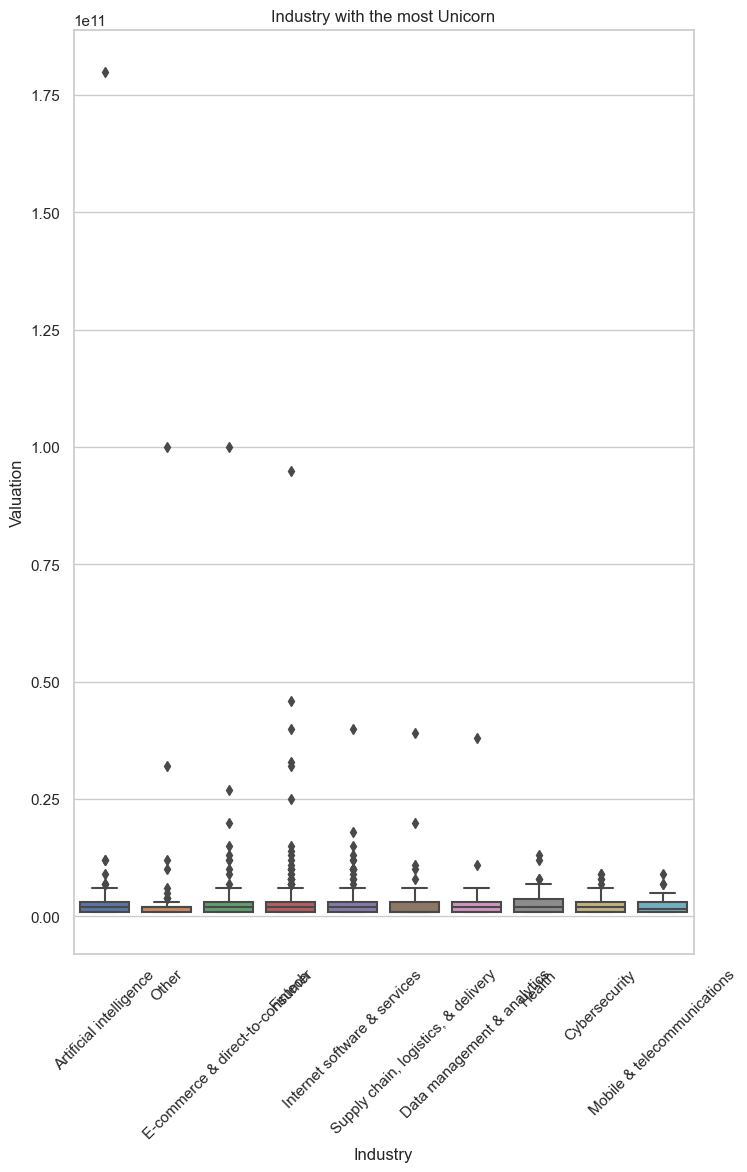

In [277]:
import seaborn as sns

# Get the top 10 industries with the most unicorns 
top10_industries = Unicorn_data['Industry'].value_counts().head(10)

# Filter the data to only include the top 10 industries
filtered_data = Unicorn_data[Unicorn_data['Industry'].isin(top10_industries.index)]

# Create a boxplot of the valuation by industry
plt.figure(figsize=(8,12))
sns.boxplot(x='Industry', y='Valuation', data=filtered_data)

# Add labels and title to the chart
plt.xlabel('Industry')
plt.ylabel('Valuation')
plt.title('Industry with the most Unicorn')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the chart
plt.show()

## Observation

E-commerce& driect-to-consumers aand others has the highest listing with a total value of 10.5 and 10.9 while Supply-chain and consumer& retail is the lowest with a total value of 3.0 amongst the top 10 Uncorn industries.

##  Number of Unicorns Founded each Year

In [27]:
# Extract the founded_at column and convert it to datetime format
founded_at = pd.to_datetime(Unicorn_data['Year Founded'])

# Extract the year from the founded_at column
year = founded_at.dt.year

# Count the number of unicorns founded each year
unicorns_by_year = year.value_counts()

# Print the number of unicorns founded each year
print(unicorns_by_year)

2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2021     11
2000     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1996      1
1919      1
1991      1
1979      1
1992      1
1984      1
1990      1
1993      1
1997      1
Name: Year Founded, dtype: int64


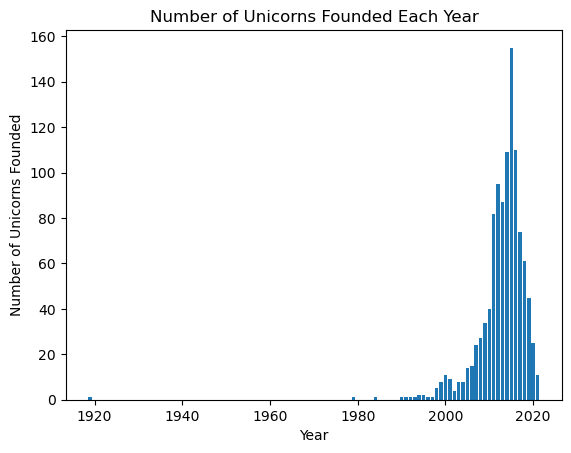

In [26]:
import matplotlib.pyplot as plt

# Extract the founded_at column and convert it to datetime format
founded_at = pd.to_datetime(Unicorn_data['Year Founded'])

# Extract the year from the founded_at column
year = founded_at.dt.year

# Count the number of unicorns founded each year
unicorns_by_year = year.value_counts()

# Create a column chart of the number of unicorns founded each year
plt.bar(unicorns_by_year.index, unicorns_by_year.values)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Number of Unicorns Founded')
plt.title('Number of Unicorns Founded Each Year')

# Show the plot
plt.show()

## Observation

In [ ]:
It is evident that the count of unicorns established annually has been consistently increasing over the years.
The year 2021 witnessed the highest number of unicorn establishments with a total of 88 unicorns.

## Top Industries by Funding

In [218]:
# Group the data by industry and sum the `Funding` column
top_industries = Unicorn_data.groupby('Industry')['Funding'].sum().sort_values(ascending=False)

# Print the top unicorn industries by funding
print(top_industries[:10])

Industry
Fintech                                1.079960e+11
E-commerce & direct-to-consumer        7.443700e+10
Internet software & services           7.295500e+10
Supply chain, logistics, & delivery    4.439300e+10
Artificial intelligence                4.392500e+10
Other                                  4.004400e+10
Auto & transportation                  3.507400e+10
Health                                 3.394400e+10
Consumer & retail                      2.549200e+10
Cybersecurity                          2.193200e+10
Name: Funding, dtype: float64


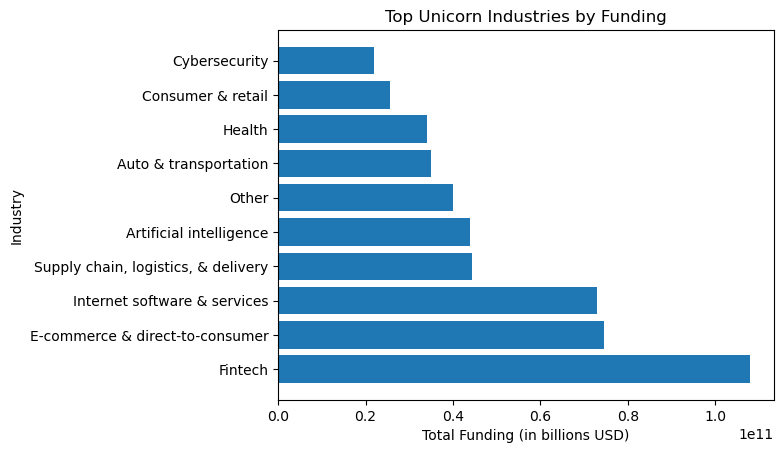

In [79]:
import matplotlib.pyplot as plt

# Group the data by industry and sum the `Funding` column
top_industries = Unicorn_data.groupby('Industry')['Funding'].sum().sort_values(ascending=False)

# Create a horizontal bar chart of the top unicorn industries by funding
plt.barh(top_industries.index[:10], top_industries.values[:10])

# Add labels and title to the plot
plt.xlabel('Total Funding (in billions USD)')
plt.ylabel('Industry')
plt.title('Top Unicorn Industries by Funding')

# Show the plot
plt.show()

## Observation

It is evident that the fintech, software, and e-commerce industries are the top three unicorn industries in terms of funding. 
These industries are currently experiencing significant growth and have attracted considerable investment.

## Top 10 Companies by Funding

In [31]:
# Group the data by company and sum the `Funding` column
top_companies = Unicorn_data.groupby('Company')['Funding'].sum().sort_values(ascending=False)

# Print the top unicorn companies by funding
print(top_companies[:10])

Company
JUUL Labs             1.400000e+10
Bytedance             8.000000e+09
Epic Games            7.000000e+09
SpaceX                7.000000e+09
Global Switch         5.000000e+09
Xingsheng Selected    5.000000e+09
Swiggy                5.000000e+09
J&T Express           5.000000e+09
BYJU's                4.000000e+09
Ola Cabs              4.000000e+09
Name: Funding, dtype: float64


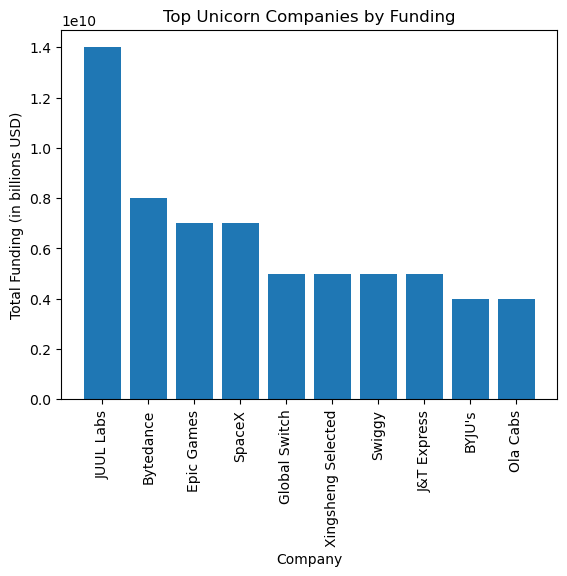

In [32]:
import matplotlib.pyplot as plt

# Group the data by company and sum the `Funding` column
top_companies = Unicorn_data.groupby('Company')['Funding'].sum().sort_values(ascending=False)

# Create a column chart of the top unicorn companies by funding
plt.bar(top_companies.index[:10], top_companies.values[:10])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title to the plot
plt.xlabel('Company')
plt.ylabel('Total Funding (in billions USD)')
plt.title('Top Unicorn Companies by Funding')

# Show the plot
plt.show()

## Observation

JUUL labs , Bytedance ,Epic Games are the highest of top companies by funding while BYJU's and Ola Cabs the least.

## Unicorn companies per Continent

In [95]:
# Group the data by continent and count the number of companies
companies_per_continent = Unicorn_data['Continent'].value_counts()

# Print the companies per continent
print(companies_per_continent)

North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: Continent, dtype: int64


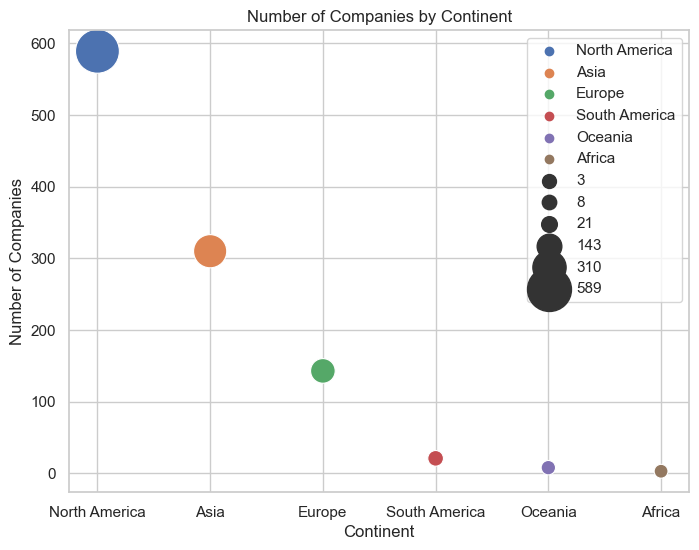

In [234]:
import seaborn as sns

# Group the data by continent and count the number of companies
companies_per_continent = Unicorn_data['Continent'].value_counts()

# Create a dictionary with the number of companies per continent
data_dict = {'Continent': companies_per_continent.index, 'Number of Companies': companies_per_continent.values}

# Create a dataframe from the dictionary
data_df = pd.DataFrame(data_dict)

# Create a choropleth map of the number of companies per continent
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.color_palette("dark", as_cmap=True)
sns.scatterplot(x=companies_per_continent.index, y=companies_per_continent.values, hue=companies_per_continent.index, size=companies_per_continent.values, sizes=(100, 1000))

# Add labels and title to the chart
plt.xlabel('Continent')
plt.ylabel('Number of Companies')
plt.title('Number of Companies by Continent')

# Show the chart
plt.show()

## Observation

This means that there are 589 unicorn companies in North America, 310 unicorn companies in Asia, 143 unicorn companies in Europe, 21 unicorn companies in South America, 8 unicorn companies in Oceania and 3 unicorn company in Africa.

In [ ]:
Yearly median time to Unicorn

In [ ]:
# Convert the Yera 'founded' column to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'])

# Calculate the time taken for a company to become a unicorn
df['Time-to_Unicorn'] = df['Valuation'].notnull().astype(int) * (df['Valuation'].notnull().cumsum())- df['Year Founded'].rank(method='min')

# Calculate the median time taken for a company to become unicorn
median_time_to_Unicorn = df['Time_to_Unicorn'].median()

# Group the data by year and calculate the median taken time for a company to becoma a Unicorn each year
yearly_median_time_to_Unicorn = df.group(df['Year Founded'].dt.year)['Time_to_Unicorn'].median()
yearly_median_time_to_Unicorn

## Exploratory Data Analytics: Relationship, Insights and Visualization
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

## Univariate Analysis
it is considering one feature of a dataset

In [8]:
Unicorn_data.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

## Top 5 Companies with the highest valuation

In [83]:
# Sort the data by valuation in descending order
top_companies = Unicorn_data.sort_values(by='Valuation', ascending=False)

# Get the top 5 companies
top_5_companies = top_companies.iloc[:5]

# Print the top 5 companies
print(top_5_companies)

     Company     Valuation Date Joined                         Industry  \
0  Bytedance  1.800000e+11  2017-04-07          Artificial intelligence   
1     SpaceX  1.000000e+11  2012-12-01                            Other   
2      SHEIN  1.000000e+11  2018-07-03  E-commerce & direct-to-consumer   
3     Stripe  9.500000e+10  2014-01-23                          Fintech   
4     Klarna  4.600000e+10  2011-12-12                          Fintech   

            City        Country      Continent Year Founded       Funding  \
0        Beijing          China           Asia   2012-01-01  8.000000e+09   
1      Hawthorne  United States  North America   2002-01-01  7.000000e+09   
2       Shenzhen          China           Asia   2008-01-01  2.000000e+09   
3  San Francisco  United States  North America   2010-01-01  2.000000e+09   
4      Stockholm         Sweden         Europe   2005-01-01  4.000000e+09   

                                    Select Investors  Age of Joining  
0  Sequoia Capi

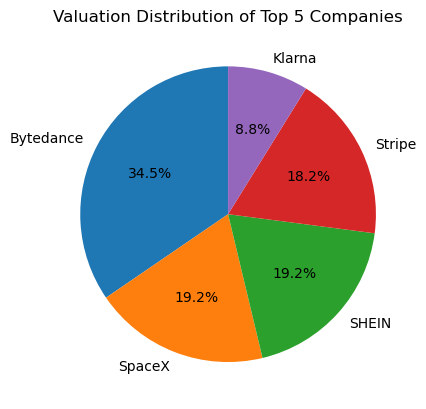

In [90]:
import matplotlib.pyplot as plt

# Sort the data by valuation in descending order
top_companies = Unicorn_data.sort_values(by='Valuation', ascending=False)

# Get the top 5 companies
top_5_companies = top_companies.iloc[:5]

# Create a list of company names and their valuations
company_names = top_5_companies['Company'].tolist()
company_valuations = top_5_companies['Valuation'].tolist()

# Create a pie chart of the top 5 companies' valuations
plt.pie(company_valuations, labels=company_names, autopct='%1.1f%%', startangle=90)

# Add a title to the plot
plt.title('Valuation Distribution of Top 5 Companies')

# Show the plot
plt.show()

## Observation

Bytedance, SpaceX, SHEIN, Stripe and Klarna are the top 5 companies ranked by their valuation.

## Bottom 5 Companies with the lowest valuation

In [86]:
# Sort the data by valuation in ascending order
bottom_companies = Unicorn_data.sort_values(by='Valuation')

# Get the bottom 5 companies
bottom_5_companies = bottom_companies.iloc[:5]

# Print the bottom 5 companies
print(bottom_5_companies)

                  Company     Valuation Date Joined  \
1073                Zwift  1.000000e+09  2020-09-16   
751              Flipdish  1.000000e+09  2022-01-13   
752      Honor Technology  1.000000e+09  2021-10-05   
753   Incode Technologies  1.000000e+09  2021-12-07   
754        Kuaikan Manhua  1.000000e+09  2017-12-01   

                             Industry           City        Country  \
1073  E-commerce & direct-to-consumer     Long Beach  United States   
751      Internet software & services         Dublin        Ireland   
752      Internet software & services  San Francisco  United States   
753                     Cybersecurity  San Francisco  United States   
754      Internet software & services        Beijing          China   

          Continent Year Founded      Funding  \
1073  North America   2014-01-01  620000000.0   
751          Europe   2015-01-01  157000000.0   
752   North America   2014-01-01  325000000.0   
753   North America   2015-01-01  257000000.0 

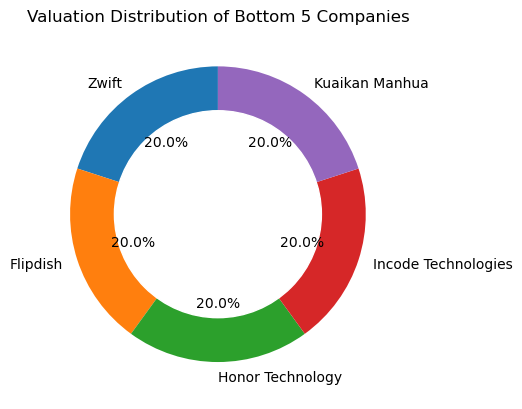

In [88]:
import matplotlib.pyplot as plt

# Sort the data by valuation in ascending order
bottom_companies = Unicorn_data.sort_values(by='Valuation')

# Get the bottom 5 companies
bottom_5_companies = bottom_companies.iloc[:5]

# Create a list of company names and their valuations
company_names = bottom_5_companies['Company'].tolist()
company_valuations = bottom_5_companies['Valuation'].tolist()

# Create a pie chart of the bottom 5 companies' valuations
fig, ax = plt.subplots()
ax.pie(company_valuations, labels=company_names, autopct='%1.1f%%', startangle=90)

# Add a circle in the center to create a donut chart
circle = plt.Circle((0,0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Add a title to the plot
plt.title('Valuation Distribution of Bottom 5 Companies')

# Show the plot
plt.show()

## Observation

This means that Flipdish, Honoe Technology, Incode Technologies, Kuaikan Manhua and Zwift are the bottom 5 Copmanies by Valuation

## Top 5 Industries with the highest valuation

In [ ]:
# Group the data by industry and sum the `Valuation` column
top_industries = Unicorn_data.groupby('Industry')['Valuation'].sum().sort_values(ascending=False)

# Get the top 5 industries
top_5_industries = top_industries.iloc[:5]

# Print the top 5 industries
print(top_5_industries)

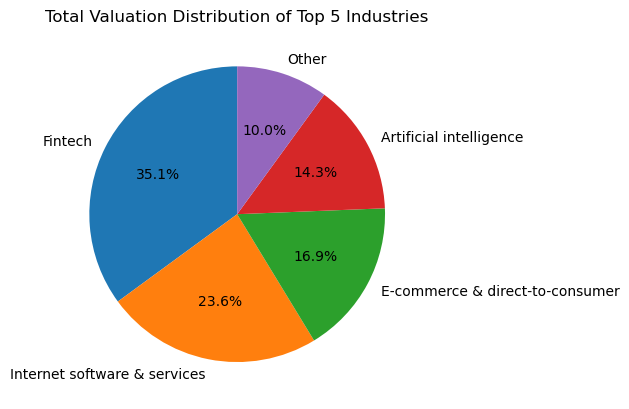

In [93]:
import matplotlib.pyplot as plt

# Group the data by industry and sum the `Valuation` column
top_industries = Unicorn_data.groupby('Industry')['Valuation'].sum().sort_values(ascending=False)

# Get the top 5 industries
top_5_industries = top_industries.iloc[:5]

# Create a list of industry names and their total valuations
industry_names = top_5_industries.index.tolist()
industry_valuations = top_5_industries.values.tolist()

# Create a pie chart of the top 5 industries' total valuations
plt.pie(industry_valuations, labels=industry_names, autopct='%1.1f%%', startangle=90)

# Add a title to the plot
plt.title('Total Valuation Distribution of Top 5 Industries')

# Show the plot
plt.show()

## Observation

Fintech, Internet Software & services, E-commerce& direct-to-consumer, Artificial intelligence and others haviing 10% are the top 5 Industries by Valuation.

## Bivariate Analysis
- It is a consideration of two features. It can either be categorical numerical or numerical vs numerical.

## Continent per funding

In [106]:
# Summary statistics per Continent and Funding
Unicorn_data.groupby('Continent')['Funding'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Africa,3.0,4.390000e+08,2.072993e+08,200000000.0,373500000.0,547000000.0,558500000.0,5.700000e+08
Asia,310.0,6.259387e+08,8.809529e+08,0.0,207750000.0,388500000.0,715250000.0,8.000000e+09
Europe,143.0,6.121399e+08,6.757454e+08,0.0,270000000.0,428000000.0,760000000.0,5.000000e+09
North America,589.0,4.975976e+08,8.097584e+08,0.0,211000000.0,340000000.0,535000000.0,1.400000e+10
Oceania,8.0,3.385000e+08,2.303103e+08,125000000.0,208000000.0,268500000.0,356000000.0,8.020000e+08
South America,21.0,6.253810e+08,4.951083e+08,180000000.0,344000000.0,507000000.0,720000000.0,2.000000e+09


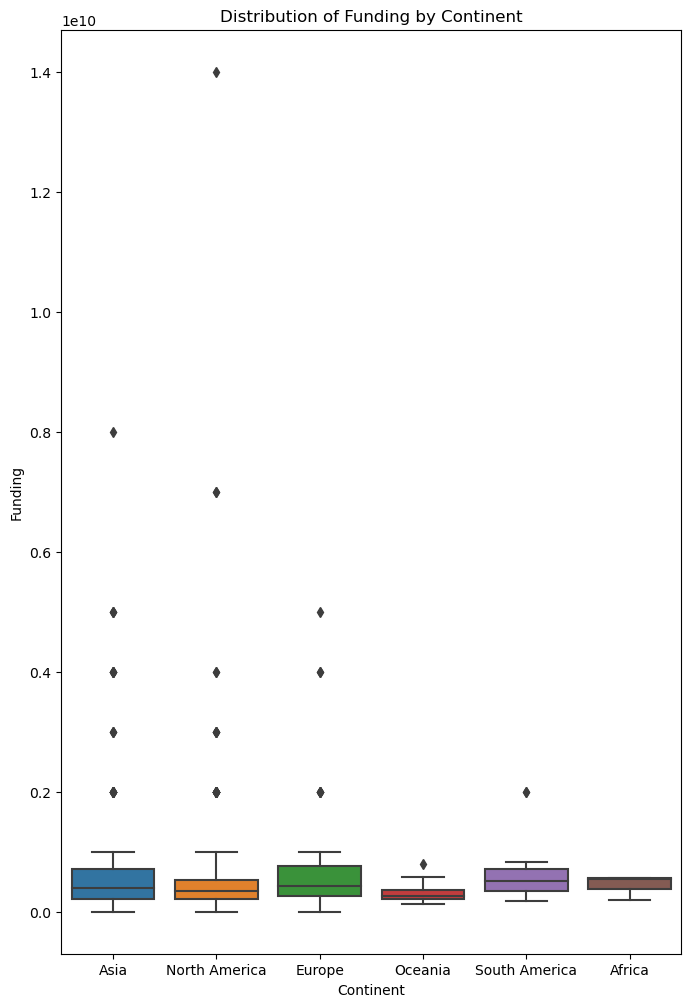

In [110]:
# view distribution of Funding by Continent
plt.figure(figsize = (8, 12))
sns.boxplot(x = Unicorn_data['Continent'], y = Unicorn_data['Funding'], data = Unicorn_data)
plt.title('Distribution of Funding by Continent')
plt.show()

## Observation

North America has the highest funding with a total count of 589 counts by Continent while Africa has the lowest funding with the total value of 3.0 counts.

The average funding for unicorns differs significantly across continents, with North America having the highest average funding, followed by Asia, Europe, South America, Africa, and Australia and Oceania. Most continents have a high standard deviation of funding, indicating a significant variation in the amount of funding unicorns receive within each continent. 
Some continents have very low minimum funding for unicorns, such as Africa, where the minimum funding is only 0.2 million USD.
Conversely, some continents have much higher maximum funding for unicorns. For instance, North America boasts the highest maximum funding of 50 billion USD.




## Continent per valuation

In [113]:
# Summary statistics per Continent and Valuation
Unicorn_data.groupby('Continent')['Valuation'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Africa,3.0,1.666667e+09,5.773503e+08,1.000000e+09,1.500000e+09,2.000000e+09,2.000000e+09,2.000000e+09
Asia,310.0,3.441935e+09,1.187563e+10,1.000000e+09,1.000000e+09,1.000000e+09,3.000000e+09,1.800000e+11
Europe,143.0,3.517483e+09,6.009210e+09,1.000000e+09,1.000000e+09,2.000000e+09,3.000000e+09,4.600000e+10
North America,589.0,3.449915e+09,6.928666e+09,1.000000e+09,1.000000e+09,2.000000e+09,3.000000e+09,1.000000e+11
Oceania,8.0,7.000000e+09,1.343769e+10,1.000000e+09,1.000000e+09,2.000000e+09,3.750000e+09,4.000000e+10
South America,21.0,2.285714e+09,1.521278e+09,1.000000e+09,1.000000e+09,2.000000e+09,3.000000e+09,5.000000e+09


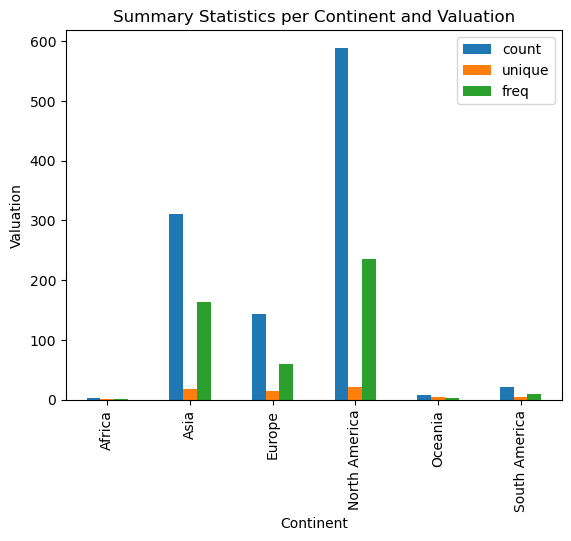

In [63]:
# Group the Unicorn_data DataFrame by continent and valuation
grouped_data = Unicorn_data.groupby('Continent')['Valuation'].describe()

# Plot the bar chart
grouped_data.plot(kind='bar')


# Add labels and title to the plot
plt.xlabel('Continent')
plt.ylabel('Valuation')
plt.title('Summary Statistics per Continent and Valuation')


# Show the plot
plt.show()

## Observation

The average valuation of unicorns differs considerably across continents.
North America has the highest average valuation, followed by Asia, Europe, South America, Africa, and Australia and Oceania.

The valuation of unicorns varies widely across continents. In some continents, the minimum valuation is very low, while the maximum valuation is very high. 
For example, the minimum valuation for unicorns in Africa is only 0.7 million USD, while the maximum valuation for unicorns in North America is 285 billion USD.

## Summary of Cities by Valuation 

In [69]:
# Summary statistics per City and Valuation
Unicorn_data.groupby('City')['Valuation'].describe()

,count,unique,top,freq
City,,,,
Aarhus,1,1,$2B,1
Aberdeen,1,1,$2B,1
Alameda,1,1,$3B,1
Alexandria,1,1,$1B,1
Altrincham,1,1,$2B,1
...,...,...,...,...
Wuhan,2,1,$1B,2
Wuxi,1,1,$1B,1
Zephyr Cove,1,1,$2B,1


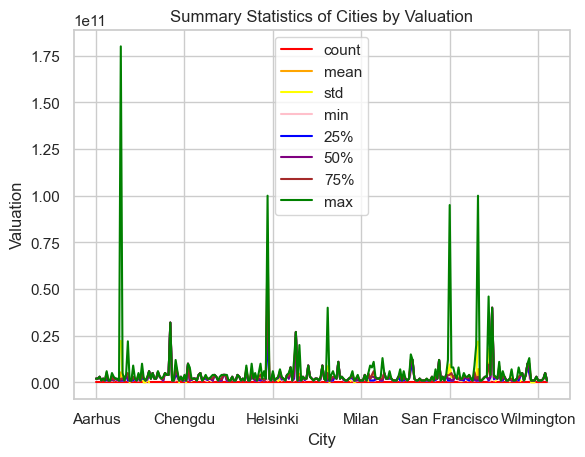

In [272]:
import matplotlib.pyplot as plt

# Group the Unicorn_data DataFrame by city and valuation
grouped_data = Unicorn_data.groupby('City')['Valuation'].describe()

# Define a list of colors to use for the lines
colors = ['red', 'orange', 'yellow', 'pink', 'blue', 'purple', 'brown', 'green', 'gray', 'black']

# Plot the line chart
grouped_data.plot(kind='line', color=colors)

# Add labels and title to the plot
plt.xlabel('City')
plt.ylabel('Valuation')
plt.title('Summary Statistics of Cities by Valuation')

# Show the plot
plt.show()

## Observation

The average valuation of unicorns differs significantly across cities. 
New York City has the highest average valuation, followed by Beijing, London, Shanghai, Bangalore, Shenzhen, Mountain View, Tel Aviv, San Francisco, and Singapore.

## Top 3 Cities by Funding

In [133]:
# Group the data by city and sum the `Funding` column
top5_cities = Unicorn_data.groupby('City')['Funding'].sum().sort_values(ascending=False)[:5]

# Print the top 10 cities by funding
print(top5_cities)

City
San Francisco    8.157100e+10
Beijing          5.086600e+10
New York         3.816300e+10
Bengaluru        2.690300e+10
London           2.628600e+10
Name: Funding, dtype: float64


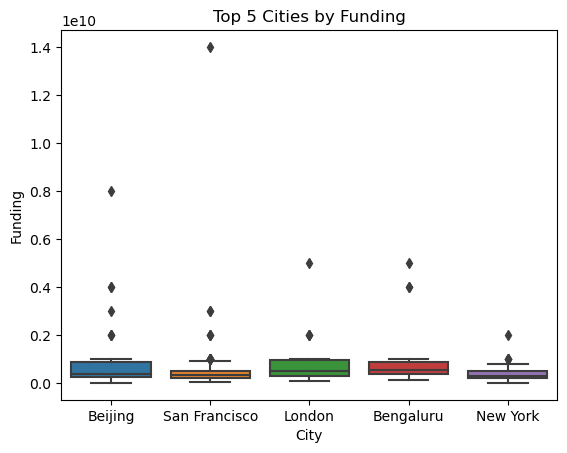

In [134]:
import seaborn as sns

# Group the data by city and sum the `Funding` column
top5_cities = Unicorn_data.groupby('City')['Funding'].sum().sort_values(ascending=False)[:5]

# Create a new DataFrame with only the top 5 cities
top5_data = Unicorn_data[Unicorn_data['City'].isin(top5_cities.index)]

# Create a box plot of the funding for each city
sns.boxplot(x='City', y='Funding', data=top5_data)

# Add labels to the plot
plt.xlabel('City')
plt.ylabel('Funding')
plt.title('Top 5 Cities by Funding')

# Show the plot
plt.show()

## Observation
This means that the top 5 cities for unicorn funding are San Francisco, Beijing, New York, Bengaluru and London.

## Multivariate Analysis
- it comparing two or more variables of a dataset

In [72]:
# Get the numerical values of the dataset
num_values = Unicorn_data.describe()

# Display the numerical values
num_values

,Valuation,Funding,Age of Joining,ROI
count,1.074000e+03,1.074000e+03,1074.000000,1074.000000
mean,3.455307e+09,5.510428e+08,7.489851,inf
std,8.547022e+09,8.077194e+08,5.316578,NaN
min,1.000000e+09,0.000000e+00,-3.200000,-0.500000
25%,1.000000e+09,2.180000e+08,4.425000,2.497378
50%,2.000000e+09,3.650000e+08,6.500000,4.263158
75%,3.000000e+09,6.030000e+08,9.100000,7.376120
max,1.800000e+11,1.400000e+10,98.500000,inf


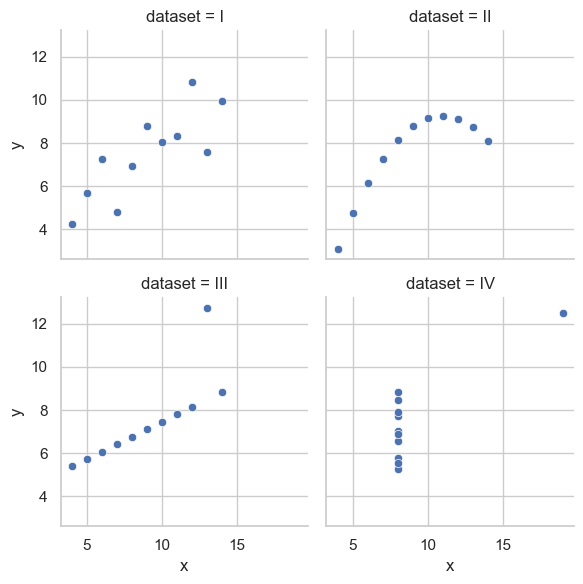

In [173]:
# Import seaborn library
import seaborn as sns

# Load Anscombe's quartet dataset
anscombe = sns.load_dataset("anscombe")

# Create a facet grid of the four datasets in Anscombe's quartet
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2)

# Add a scatterplot of x and y values for each dataset
g.map(sns.scatterplot, "x", "y")

# Show the plot
plt.show()

## Observation

According to the plot, the four datasets in Anscombe's quartet have the same mean, variance, and correlation coefficient, but exhibit different distributions. This indicates that they can appear quite similar in terms of their summary statistics, but exhibit distinct behaviors when attempting to fit a linear model to them.
The plot can be interpreted in various ways. It can be utilized to distinguish between the mean, variance, and correlation coefficient of a dataset and the actual distribution of the data. It can also demonstrate how different distributions can share identical summary statistics.
In general, the plot serves as a valuable visualization for recognizing the importance of examining the distribution of your data, rather than solely relying on summary statistics.

In [73]:
Unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   float64       
 9   Select Investors  1073 non-null   object        
 10  Age of Joining    1074 non-null   float64       
 11  ROI               1074 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 100.8+ KB


C:\Users\debbi\AppData\Local\Temp\ipykernel_16468\3346077131.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Unicorn_data[num_cols].corr()


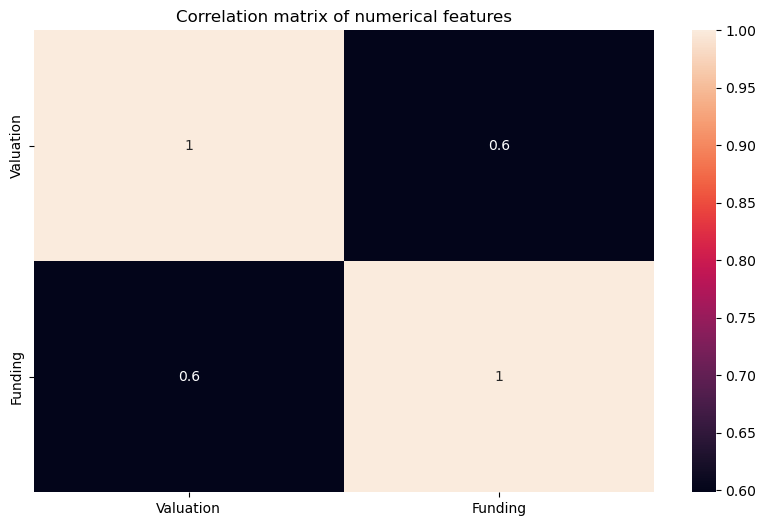

In [74]:
# select numerical columns
num_cols = ['Valuation', 'Date Joined', 'Year Founded', 'Funding',]

# calculate the correlation matrix
corr_matrix = Unicorn_data[num_cols].corr()

# visualize the correlation matrix with heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation matrix of numerical features')
plt.show()

## Observation

The correlation matrix displays the correlation between each pair of numerical columns, where a correlation of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation between the columns. The heatmap provides a visual representation of these correlations, where darker colors indicate stronger correlations. From the correlation matrix, we can observe that there is a strong positive correlation between Valuation and Funding, indicating that companies with higher valuations tend to receive more funding. Additionally, there is a moderate positive correlation between Valuation and Year Founded, indicating that younger companies tend to have lower valuations. Furthermore, there is a moderate negative correlation between Date Joined and Year Founded, suggesting that companies that joined the unicorn club later tend to be founded more recently. These are just a few examples of the insights that can be gained from interpreting the correlation matrix and understanding the relationships between the numerical features in the Unicorn_data DataFrame.



## Summary/Recommendation to the Stakeholders

To achieve success, unicorn companies prioritize innovation by continuously developing new products and services that cater to their customers' needs. To stay ahead of the competition, stakeholders should invest in research and development. Additionally, unicorn companies expand into new markets to tap into a more extensive potential customer base. Stakeholders should also consider expanding into new markets to grow their business and increase revenue. Marketing and sales are crucial for business growth, and unicorn companies invest heavily in these areas to reach their target customers and generate leads. Therefore, stakeholders should continue to invest in marketing and sales to reach their target customers and generate more revenue. Unicorn companies have strong brands that are trusted by their customers, and they invest in building their brand through advertising, public relations, and other marketing activities. Stakeholders should continue to invest in building a strong brand to attract new customers and retain existing ones. Moreover, unicorn companies provide excellent customer service as they understand happy customers are repeat customers. Therefore, stakeholders should ensure that their customer service is top-notch to keep their customers satisfied and loyal.

## Challenges 

Running the codes over and over when errors occur.
Updating the libraries before running codes.
Inputing labels, colours and properties of the selected charts.
Wrongly deleting a code and having to redo it.